#JUPYTER NOTEBOOK 
Congratulations on opening your first Jupyter Notebook. You have stepped into the world of Data Science, Machine Learning and Artificial Intelligence. The Jupyter Notebook is a tool for interactively developing machine learning algorithms with the data you have. 

A `notebook` integrates code and instructions or comments. 

## Cell

A notebook is made of many cells. Each cell can be a text cell or a code cell. Code cells can return no output or return an output in textform or returns output as embedded images and graphs. Text cells are rendered just as a HTML text.

<img src="https://raw.githubusercontent.com/lauvshree/datasets/main/Screen%20Shot%202021-05-19%20at%2012.59.47%20pm.png" width="75%" style="border:1px solid grey"/>

To run a code cell, keep the cursor on the cell and press `shift` and `Enter` (`Return` in the case of Mac) together.

Now that you have been introduced to Jupyter notebook let's get started.



# Import all the packages required

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns


#Read the dataset  from the remote URL

In [36]:
titanic_df = pd.read_csv("https://gist.githubusercontent.com/lauvshree/17b55fb20ce1d11787b2e03281382dab/raw/5f7e228e4ff3201824a4e241e04ae076cb23ffec/titanic.csv")

#Check the data in the dataset

In [38]:
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#Get some information about the type of data in the dataset

In [6]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#Check if the total amount missing data.

In [7]:
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#Remove all the columns which will not influence the result

In [8]:
titanic_df.drop(['name'],  axis=1,inplace=True) 
titanic_df.drop(['cabin'],  axis=1,inplace=True) 
titanic_df.drop(['ticket'],  axis=1,inplace=True) 
titanic_df.drop(['home.dest'],  axis=1,inplace=True) 
titanic_df.drop(['boat'],  axis=1,inplace=True) 
titanic_df.drop(['body'],  axis=1,inplace=True) 


#Get dummy numbers to replace the Strings. 

In [9]:
titanic_df['sex'] = pd.get_dummies(titanic_df.sex)
titanic_df['embarked'] = pd.get_dummies(titanic_df.embarked)

#Observe the encoded values.

In [12]:
titanic_df[['sex','embarked']]

,sex,embarked
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
1304,1,1
1305,1,1
1306,0,1
1307,0,1


#Plot a graph to visually observe the number of people who survived across age groups

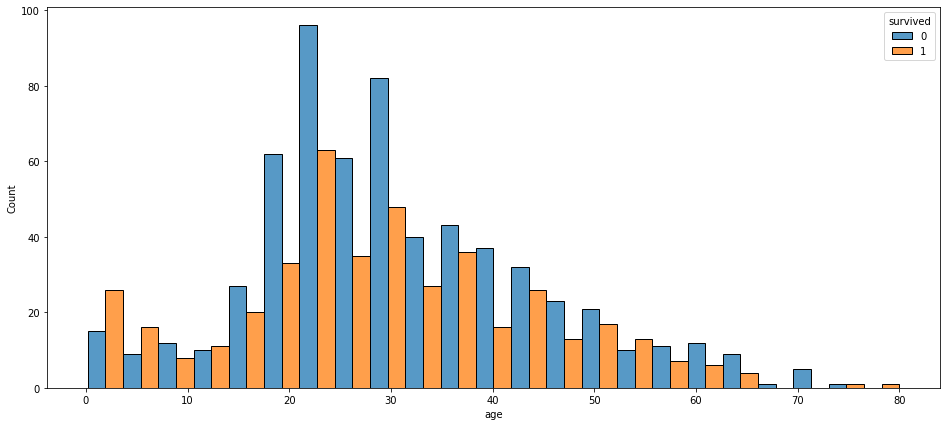

In [13]:
plt.figure(figsize=(16, 7))
sns.histplot(data=titanic_df, x='age', hue='survived',multiple="dodge")
plt.show()

#Plot a graph to visually observe the number of people who survived based on gender

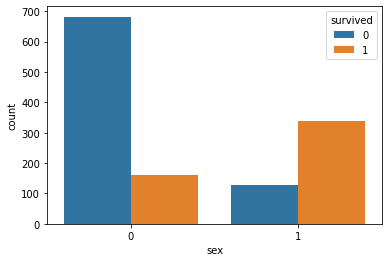

In [14]:
sns.countplot(data=titanic_df, x='sex', hue='survived')

plt.show()

#Fill the missing values with the median values of that column

In [15]:
titanic_df.fillna(titanic_df.median(), inplace=True)

In [16]:
titanic_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.00,0,0,211.3375,0
1,1,1,0,0.92,1,2,151.5500,0
2,1,0,1,2.00,1,2,151.5500,0
3,1,0,0,30.00,1,2,151.5500,0
4,1,0,1,25.00,1,2,151.5500,0
...,...,...,...,...,...,...,...,...
1304,3,0,1,14.50,1,0,14.4542,1
1305,3,0,1,28.00,1,0,14.4542,1
1306,3,0,0,26.50,0,0,7.2250,1
1307,3,0,0,27.00,0,0,7.2250,1


#Separate the outcome we are trying to predict from the dataset

In [17]:
X = titanic_df.drop(['survived'], axis=1)
y = titanic_df[['survived']]

#Split the dataset into test and training data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

#Choose a classification model. Fit the training data in the model. Then make predictions with the test data and check its accuracy score.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=14,
                       verbose=0, warm_start=False)

clf.fit(X_train,np.ravel(y_train))

y_pred = clf.predict(X_test)

print("The accuracy score is ",accuracy_score(y_test, y_pred)*100,"%")

The accuracy score is  79.62962962962963 %


#Save the model using the pickle package

> Run the following command to use you Google Drive for storage purpose. It gives you a link and prompts you for a password. You can click on the link and use your google account to generate a unique password for the session and paste it in the space allocated to enter the password.

In [31]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


#Save the model to be used later.

In [32]:
import pickle

saved_model = pickle.dumps(clf)


filename = '/content/gdrive/MyDrive/finalized_model.sav'
pickle.dump(saved_model, open(filename, 'wb'))
 

#Use the model saved earlier to predict. 

1. Open and load the model
2. Pass the parameters to predict.

In [40]:
with open('/content/gdrive/MyDrive/finalized_model.sav', 'rb') as file:  
    loaded_model = pickle.load(file)

clf = pickle.loads(loaded_model)

class_travelled = 2
# Gender 1 is for Female and 0 for male
gender = 1 
age = 29
siblingOrSpouse=0
parentOrChild=0
fare = 211
# Port of Embarkment  0 - South Hampton, 1 - Cherbourgh and  2 - Queenstown
embark = 1

# # Use the loaded pickled model to make predictions
print(clf.predict([[class_travelled,gender,age,siblingOrSpouse,parentOrChild, fare,embark]]))

[1]


The output 1 implies the passenger whose details were passed to the predictor is predicted to have survived. The output 0 implies the passenger did not survive. The output is returned as an array. Try passing more than one passenger details, and see what the output is.

<details><summary>Click here for the code to pass more than one passenger details</summary>

```python
# # Use the loaded pickled model to make predictions
print(clf.predict([[2,0,25,0,0, 100,1],
                   [2,1,25,0,0, 150,0],
                   [1,1,25,0,0, 213,2]]))
)
```
EVERY ARRAY HERE PERTAINS TO ONE PASSANGER. CAN YOU GUESS WHAT EACH OF THESE VALUES PASSED MEAN?
</details>

In [54]:
print(clf.predict([[2,0,25,0,0, 100,1],
                   [2,1,25,0,0, 150,0],
                   [1,1,25,0,0, 213,2]]))


[1 1 1]
